In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']


tss_annotation = doc['tss_annotation']


import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 15)


In [2]:
import annotation

## Create histograms of coverage centered on peaks in RefSeq and Experimental peaks

In [3]:
import time

## Old coverage histograms where not filtering for the gene peaks.

In [ ]:
mRNA_peak_file = '/data/isshamie/genome/picr_final/mRNA_final.peak'
out_dir = 'Results/coverage_histograms'

if not os.path.exists(out_dir):
    os.mkdir(out_dir)


for t in tissues:
    for s in ['GROCap','START']:
        curr_time = time.time()
        
        # Get the tag and peak files
        tag_files = 'f03_tags/*%s*%s*/' % (t,s)
        tag_files = glob.glob(tag_files) 
        peak_files = 'f04_peaks/*%s*%s*' % (t,s)
        peak_files = glob.glob(peak_files)
        if len(tag_files) != 0:
            curr_dir = os.path.join(out_dir,s + '_' + t)
            if not os.path.exists(curr_dir):
                os.mkdir(curr_dir)
            for i in peak_files:
                ## Create a peak file of refseq relative to peak file
                mrna_filt = os.path.join(curr_dir,os.path.basename(i)+'_mRNA')
                print('mrna_filt',mrna_filt)
                print('input to mrna_peak',i)
                if not os.path.exists(mrna_filt):
                    peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt)
                for j in tag_files:
                    # Refseq 
                    output_file_mrna = os.path.join(curr_dir,os.path.basename(i) + '_' + os.path.basename(j) + '.hist.mrna')
                    print('output histogram mrna',output_file_mrna)
                    hist(j,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
                    hist_plot(output_file_mrna)
                    heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '_heat.png' )
                    
                    # Experimental 
                    output_file_exp = os.path.join(curr_dir,os.path.basename(i) + '_' + os.path.basename(j) + '.hist.exp')
                    print('output histogram exp',output_file_exp)
                    hist(j,output_file_exp,ref_fa,anno_gff,mode='peak',peak=i,region=4000,res=25,pc=3)
                    hist_plot(output_file_exp)
                    heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '_heat.png' )                    
        print('Time elapsed', time.time()-curr_time)

('Time elapsed', 0.0005578994750976562)
('Time elapsed', 0.000614166259765625)
('mrna_filt', 'Results/coverage_histograms/GROCap_BMDMwt/BMDMwt_GROCap1_and_BMDMwt_GRO1_mRNA')
('input to mrna_peak', 'f04_peaks/BMDMwt_GROCap1_and_BMDMwt_GRO1')
('output histogram mrna', 'Results/coverage_histograms/GROCap_BMDMwt/BMDMwt_GROCap1_and_BMDMwt_GRO1_.hist.mrna')
annotatePeaks.pl Results/coverage_histograms/GROCap_BMDMwt/BMDMwt_GROCap1_and_BMDMwt_GRO1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d f03_tags/BMDMwt_GROCap1/ -pc 3 > Results/coverage_histograms/GROCap_BMDMwt/BMDMwt_GROCap1_and_BMDMwt_GRO1_.hist.mrna
annotatePeaks.pl Results/coverage_histograms/GROCap_BMDMwt/BMDMwt_GROCap1_and_BMDMwt_GRO1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d f03_tags/BMDMwt_GROCap1/ -pc 3 > Results/coverage_histograms/GR

## Using peaks found near genes and specific to each sample

In [ ]:
mRNA_peak_file = '/data/isshamie/genome/picr_final/mRNA_final.peak'
out_dir = 'Results/coverage_histograms'

if not os.path.exists(out_dir):
    os.mkdir(out_dir)


for t in tissues:
    print(t)
    for s in ['GROCap','START']:
        curr_time = time.time()
        
        # Get the tag and peak files
        tag_files = 'f03_tags/*%s*%s*/' % (t,s)
        tag_files = glob.glob(tag_files) 
        peak_files = 'Results/tss_annotation_peaks/*%s*%s*' % (t,s)
        peak_files = glob.glob(peak_files)
        if len(tag_files) != 0:
            curr_dir = os.path.join(out_dir,s + '_' + t)
            if not os.path.exists(curr_dir):
                os.mkdir(curr_dir)
            for i in peak_files:
                ## Create a peak file of refseq relative to peak file
                mrna_filt = os.path.join(curr_dir,os.path.basename(i.split('.',1)[0])+'_mRNA')
                print('mrna_filt',mrna_filt)
                print('input to mrna_peak',i)
                if not os.path.exists(mrna_filt + 'filt'):
                    peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt)
                for j in tag_files:
                    # Refseq 
                    output_file_mrna = os.path.join(curr_dir,os.path.basename(i.split('.',1)[0]) + '.hist.mrna')
                    print('output histogram mrna',output_file_mrna)
                    hist(j,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
                    hist_plot(output_file_mrna)
                    heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )
                    
                    # Experimental 
                    output_file_exp = os.path.join(curr_dir,os.path.basename(i.split('.',1)[0]) + '.hist.exp')
                    print('output histogram exp',output_file_exp)
                    hist(j,output_file_exp,ref_fa,anno_gff,mode='peak',peak=i,region=4000,res=25,pc=3)
                    hist_plot(output_file_exp)
                    heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )                    
        print('Time elapsed', time.time()-curr_time)

BMDM1hKLA
('Time elapsed', 0.00090789794921875)
('Time elapsed', 0.0005781650543212891)
BMDMwt
('mrna_filt', 'Results/coverage_histograms/GROCap_BMDMwt/sample_BMDMwt_GROCap1_and_BMDMwt_GRO1_mRNA')
('input to mrna_peak', 'Results/tss_annotation_peaks/sample_BMDMwt_GROCap1_and_BMDMwt_GRO1.tsv')
('output histogram mrna', 'Results/coverage_histograms/GROCap_BMDMwt/sample_BMDMwt_GROCap1_and_BMDMwt_GRO1.hist.mrna')
annotatePeaks.pl Results/coverage_histograms/GROCap_BMDMwt/sample_BMDMwt_GROCap1_and_BMDMwt_GRO1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d f03_tags/BMDMwt_GROCap1/ -pc 3 > Results/coverage_histograms/GROCap_BMDMwt/sample_BMDMwt_GROCap1_and_BMDMwt_GRO1.hist.mrna
annotatePeaks.pl Results/coverage_histograms/GROCap_BMDMwt/sample_BMDMwt_GROCap1_and_BMDMwt_GRO1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -

annotatePeaks.pl Results/coverage_histograms/GROCap_Brain/sample_Brain_GROCap1_and_Brain_GRO1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d f03_tags/Brain_GROCap1/ -pc 3 -strand - > Results/coverage_histograms/GROCap_Brain/sample_Brain_GROCap1_and_Brain_GRO1.hist.mrnaMatAS
('output histogram exp', 'Results/coverage_histograms/GROCap_Brain/sample_Brain_GROCap1_and_Brain_GRO1.hist.exp')
annotatePeaks.pl Results/tss_annotation_peaks/sample_Brain_GROCap1_and_Brain_GRO1.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d f03_tags/Brain_GROCap1/ -pc 3 > Results/coverage_histograms/GROCap_Brain/sample_Brain_GROCap1_and_Brain_GRO1.hist.exp
annotatePeaks.pl Results/tss_annotation_peaks/sample_Brain_GROCap1_and_Brain_GRO1.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLen

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


('output histogram exp', 'Results/coverage_histograms/GROCap_Brain/merged_Brain_GROCap1_and_Brain_GRO1.hist.exp')
annotatePeaks.pl Results/tss_annotation_peaks/merged_Brain_GROCap1_and_Brain_GRO1.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d f03_tags/Brain_GROCap1/ -pc 3 > Results/coverage_histograms/GROCap_Brain/merged_Brain_GROCap1_and_Brain_GRO1.hist.exp
annotatePeaks.pl Results/tss_annotation_peaks/merged_Brain_GROCap1_and_Brain_GRO1.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d f03_tags/Brain_GROCap1/ -pc 3 > Results/coverage_histograms/GROCap_Brain/merged_Brain_GROCap1_and_Brain_GRO1.hist.expNorm
annotatePeaks.pl Results/tss_annotation_peaks/merged_Brain_GROCap1_and_Brain_GRO1.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist

annotatePeaks.pl Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d f03_tags/Brain_START1/ -pc 3 > Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput1.hist.mrnaNorm
annotatePeaks.pl Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d f03_tags/Brain_START1/ -pc 3 -strand + > Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput1.hist.mrnaMatS
annotatePeaks.pl Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d f03

annotatePeaks.pl Results/tss_annotation_peaks/merged_Brain_START3_and_Brain_STARTinput2.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d f03_tags/Brain_START3/ -pc 3 -strand + > Results/coverage_histograms/START_Brain/merged_Brain_START3_and_Brain_STARTinput2.hist.expMatS
annotatePeaks.pl Results/tss_annotation_peaks/merged_Brain_START3_and_Brain_STARTinput2.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d f03_tags/Brain_START3/ -pc 3 -strand - > Results/coverage_histograms/START_Brain/merged_Brain_START3_and_Brain_STARTinput2.hist.expMatAS
('output histogram mrna', 'Results/coverage_histograms/START_Brain/merged_Brain_START3_and_Brain_STARTinput2.hist.mrna')
annotatePeaks.pl Results/coverage_histograms/START_Brain/merged_Brain_START3_and_Brain_STARTinput2_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff 

annotatePeaks.pl Results/coverage_histograms/START_Brain/sample_Brain_START1_and_Brain_STARTinput1_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d f03_tags/Brain_START3/ -pc 3 -strand - > Results/coverage_histograms/START_Brain/sample_Brain_START1_and_Brain_STARTinput1.hist.mrnaMatAS
('output histogram exp', 'Results/coverage_histograms/START_Brain/sample_Brain_START1_and_Brain_STARTinput1.hist.exp')
annotatePeaks.pl Results/tss_annotation_peaks/sample_Brain_START1_and_Brain_STARTinput1.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d f03_tags/Brain_START3/ -pc 3 > Results/coverage_histograms/START_Brain/sample_Brain_START1_and_Brain_STARTinput1.hist.exp
annotatePeaks.pl Results/tss_annotation_peaks/sample_Brain_START1_and_Brain_STARTinput1.tsv /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/

('output histogram mrna', 'Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput2.hist.mrna')
annotatePeaks.pl Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput2_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d f03_tags/Brain_START3/ -pc 3 > Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput2.hist.mrna
annotatePeaks.pl Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput2_mRNAfilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d f03_tags/Brain_START3/ -pc 3 > Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput2.hist.mrnaNorm
annotatePeaks.pl Results/coverage_histograms/START_Brain/merged_Brain_START2_and_Brain_STARTinput2_mRNAfilt /data/isshamie/genome/picr_final/picr

In [ ]:
i = "Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv"
mRNA_peak_file = "Results/coverage_histograms/all_peaks_gene_df_01.hist."

peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt)

print('mrna_filt',mrna_filt)
print('input to mrna_peak',i)
('mrna_filt', 'Results/coverage_histograms/GROCap_BMDMwt/sample_BMDMwt_GROCap1_and_BMDMwt_GRO1_mRNA')
('input to mrna_peak', 'Results/tss_annotation_peaks/sample_BMDMwt_GROCap1_and_BMDMwt_GRO1.tsv')

# Run on all peaks and all tags merged

In [8]:
mRNA_peak_file = '/data/isshamie/genome/picr_final/mRNA_final.peak'
i = "Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv"
mrna_filt = "Results/coverage_histograms/all_peaks_gene_df_01.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt)


,ID,Chr,Start,End,Strand,actual_start
3,ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,44541,44543,-,44542
6,ID=asmbl_7;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,44596,44598,-,44597
7,ID=asmbl_8;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,44596,44598,-,44597
8,ID=asmbl_9;Parent=gene_2;gene_id=gene_2;gene=R...,picr_0,44567,44569,-,44568
9,ID=asmbl_10;Parent=gene_2;gene_id=gene_2;gene=...,picr_0,44512,44514,-,44513
11,ID=asmbl_12;Parent=gene_1_4;gene_id=gene_1_4;g...,picr_0,20786,20788,+,20787
12,ID=asmbl_13;Parent=gene_1_4;gene_id=gene_1_4;g...,picr_0,20941,20943,+,20942
13,ID=asmbl_14;Parent=gene_1_4;gene_id=gene_1_4;g...,picr_0,20941,20943,+,20942
15,ID=asmbl_16;Parent=gene_2;gene_id=gene_2;gene=...,picr_0,44548,44550,-,44549
18,ID=asmbl_19;Parent=gene_3_1;gene_id=gene_3_1;g...,picr_0,78254,78256,-,78255


('output histogram mrna', 'Results/coverage_histograms/all_peaks_gene_df_01.hist.mrna')
annotatePeaks.pl Results/coverage_histograms/all_peaks_gene_df_01.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged -pc 3 > Results/coverage_histograms/all_peaks_gene_df_01.hist.mrna
annotatePeaks.pl Results/coverage_histograms/all_peaks_gene_df_01.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged -pc 3 > Results/coverage_histograms/all_peaks_gene_df_01.hist.mrnaNorm
annotatePeaks.pl Results/coverage_histograms/all_peaks_gene_df_01.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d Results/merged/tags_TSS_merged -pc 3 -strand + > Results/coverage_histograms/all_peak

,-2000,-1975,-1950,-1925,-1900,-1875,-1850,-1825,-1800,-1775,...,1775,1800,1825,1850,1875,1900,1925,1950,1975,2000
Gene,,,,,,,,,,,,,,,,,,,,,
507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002055,0.002055,0.000000,0.004111,0.000000,0.000000,0.000000,0.000000
614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005795,0.000000,0.001656,0.001656,0.000000,0.001656,0.005795,0.003311,0.004139,0.002483
1004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004890,0.000000,0.004890,0.000000
1080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004615,0.006154,0.000000,0.004615,0.003077,0.000000,0.003077,0.000000,0.000000
38,0.003405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002270,0.002270,0.000000,0.000000,0.002270,0.004540,0.000000,0.007946,0.002270,0.000000
560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002481,0.000000,0.000000,0.004963,0.006203,0.000000,0.000000,0.000000,0.000000,0.000000
623,0.007859,0.002947,0.000000,0.001965,0.004912,0.001965,0.014735,0.010806,0.020629,0.016699,...,0.000000,0.000000,0.003929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002766,0.000000,0.000000,0.000000,0.000000,0.002766,0.000000,0.000000,0.006916,0.000000
1076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


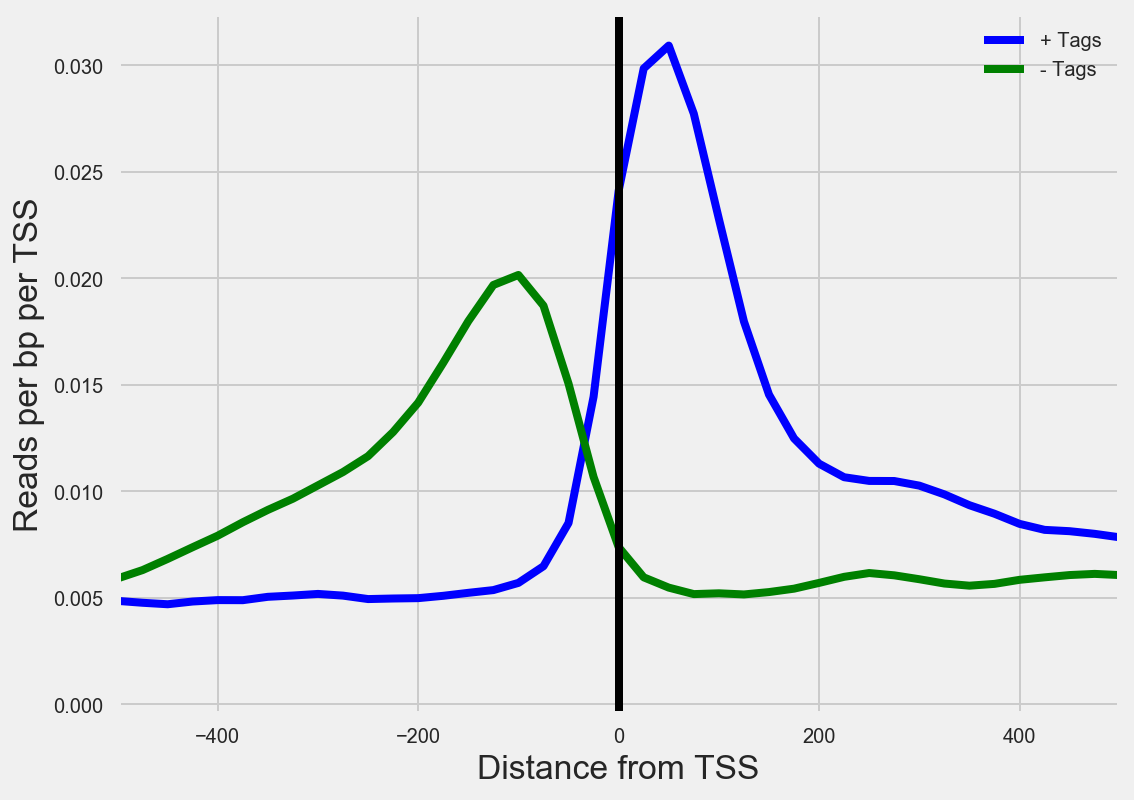

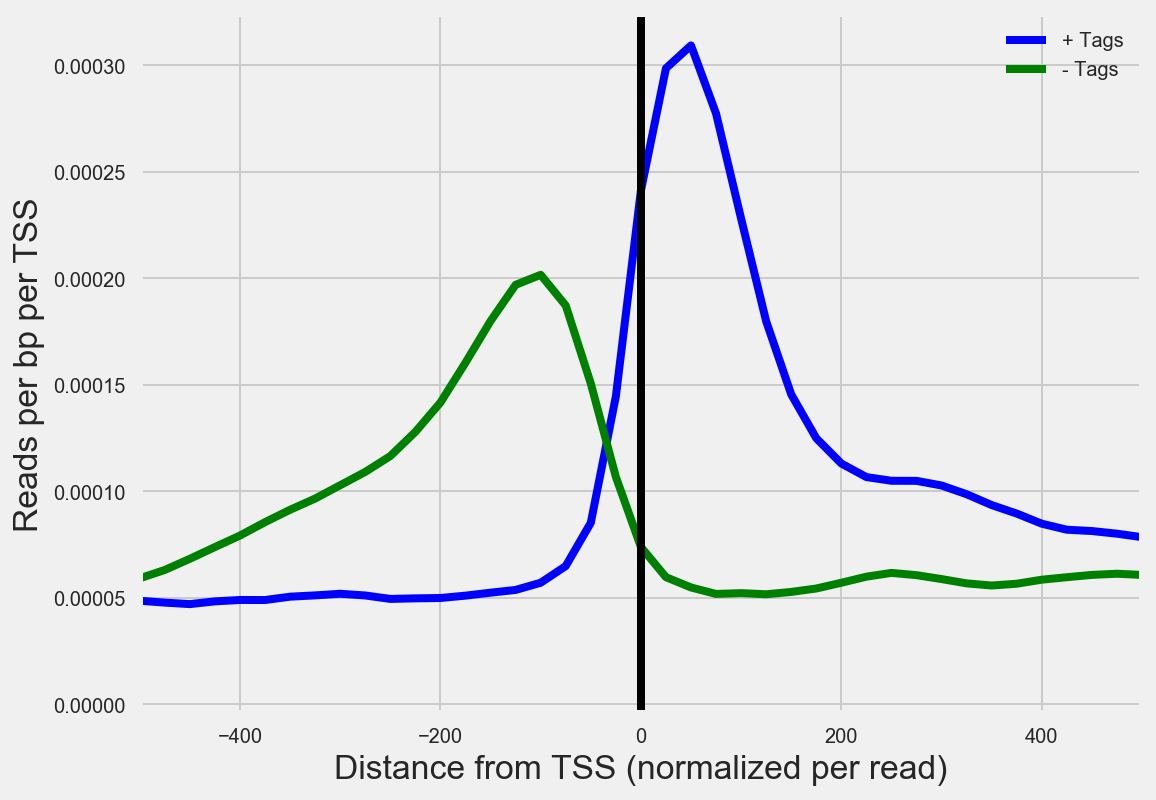

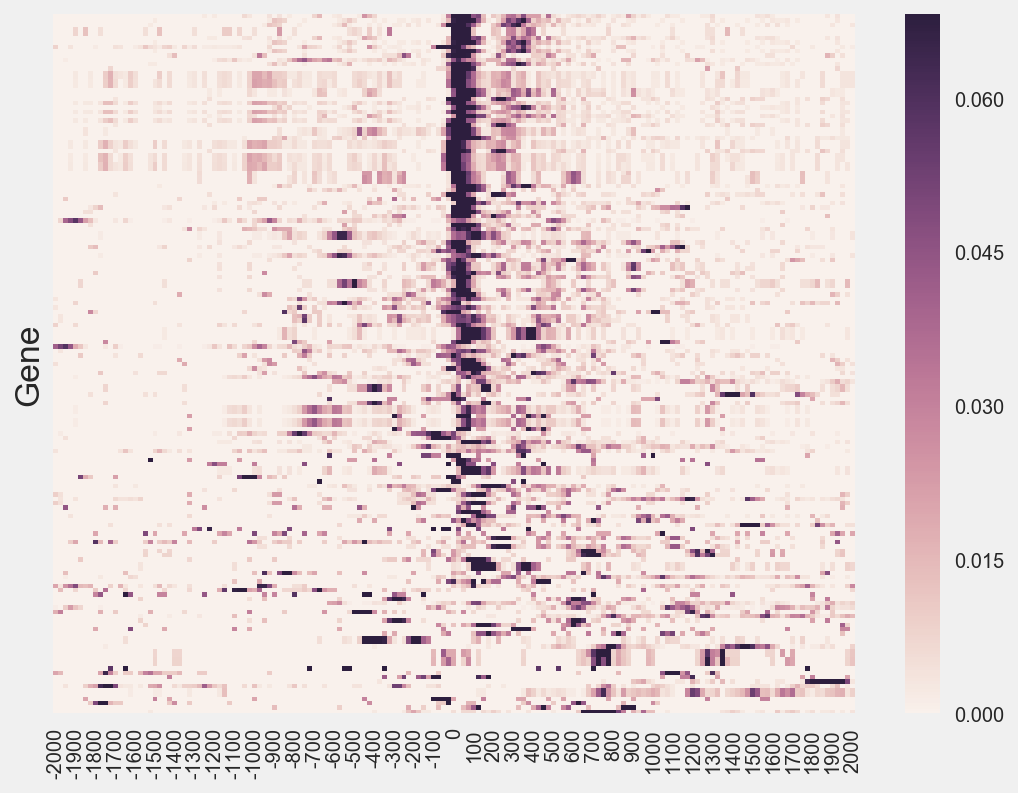

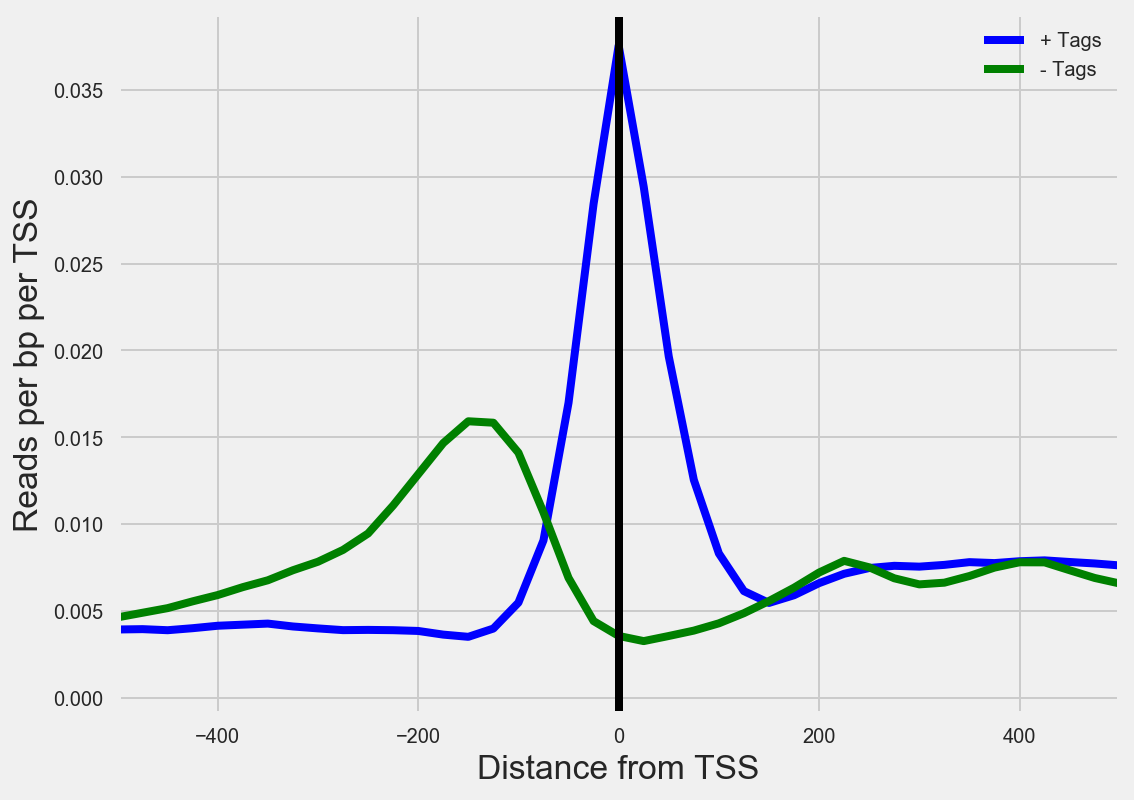

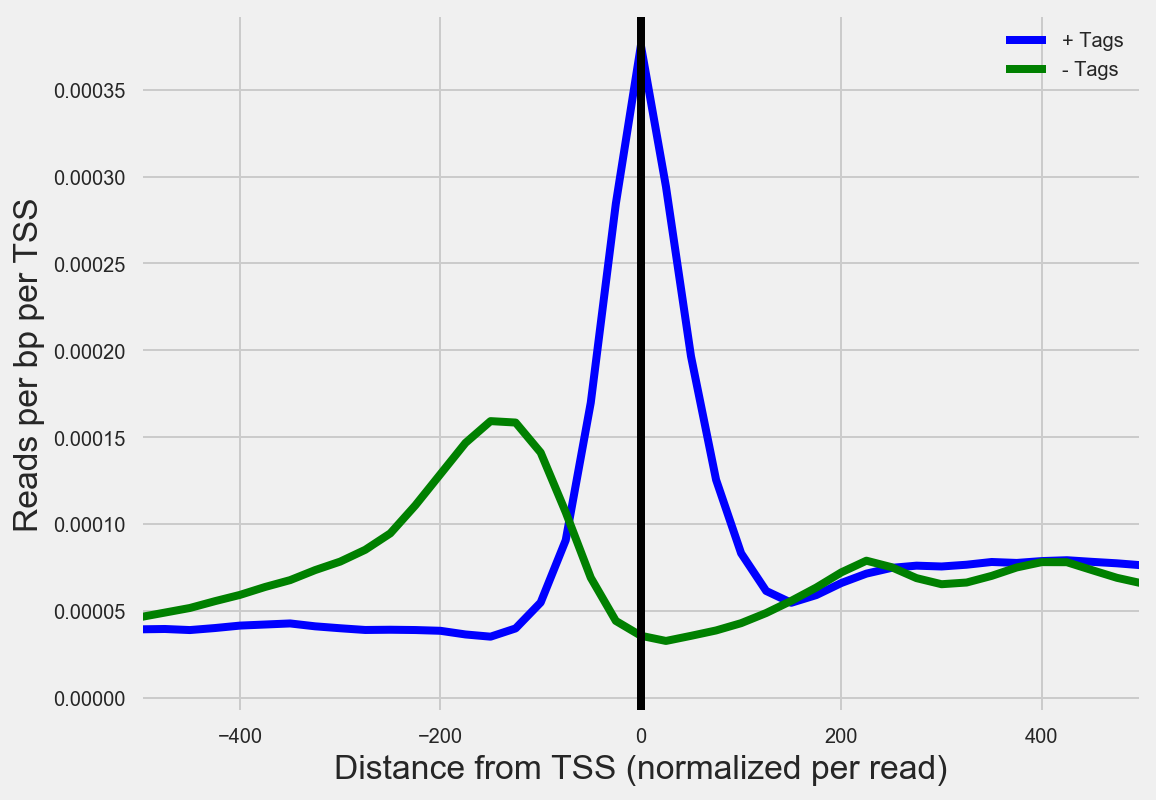

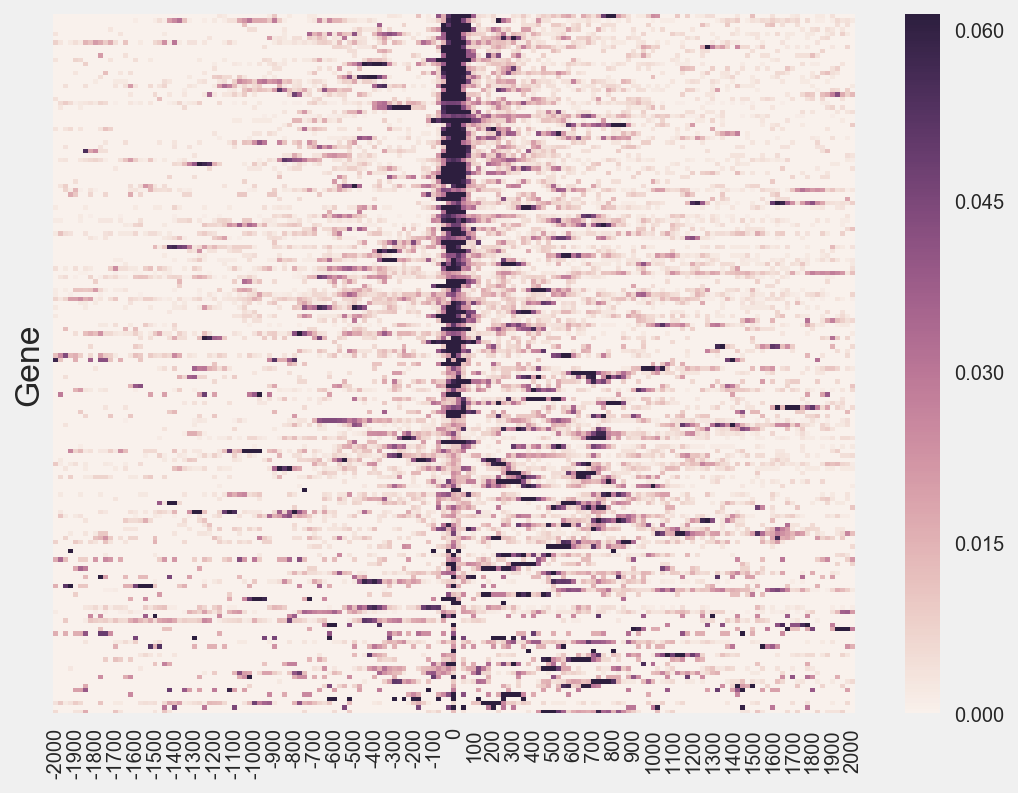

In [10]:
peak_f = "Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv"
tag_f = "Results/merged/tags_TSS_merged"

# Refseq 
# mRNA_peak_file = '/data/isshamie/genome/picr_final/mRNA_final.peak'
# i = "Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv"
# mrna_filt = "Results/coverage_histograms/all_peaks_gene_df_01.mrna"
# peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt)

output_file_mrna = os.path.join(out_dir,os.path.basename(peak_f.split('.',1)[0]) + '.hist.mrna')
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = os.path.join(out_dir,os.path.basename(peak_f.split('.',1)[0]) + '.hist.exp')
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=i,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

## Plot side-by-side of Refseq and experimental

In [7]:
out_dir = 'Results/coverage_histograms'

for t in tissues:
    print(t)
    for s in ['GROCap','START']:
        curr_time = time.time()
        # Get the tag and peak files
        curr_dir = os.path.join(out_dir,s+ "_" + t)
        mrna = glob.glob(os.path.join(curr_dir,'*.mrna'))
        exp = list(map(lambda x: x.replace("mrna","exp"),mrna))
        for i in zip(exp,mrna):
            out_f = i[0].replace("exp","Compare.png")
            wrap_hist_plot(i,hist_save=out_f,names=["Experimental","RefSeq"])

BMDM1hKLA
BMDMwt
Brain
FemaleReproductive
Heart
Kidney
Liver
Lung
MiscOrgans
Muscle
Pancreas
Skin
Spleen
Total
CHO


## Compare the merged peak center vs the original peak center

Original
Merged


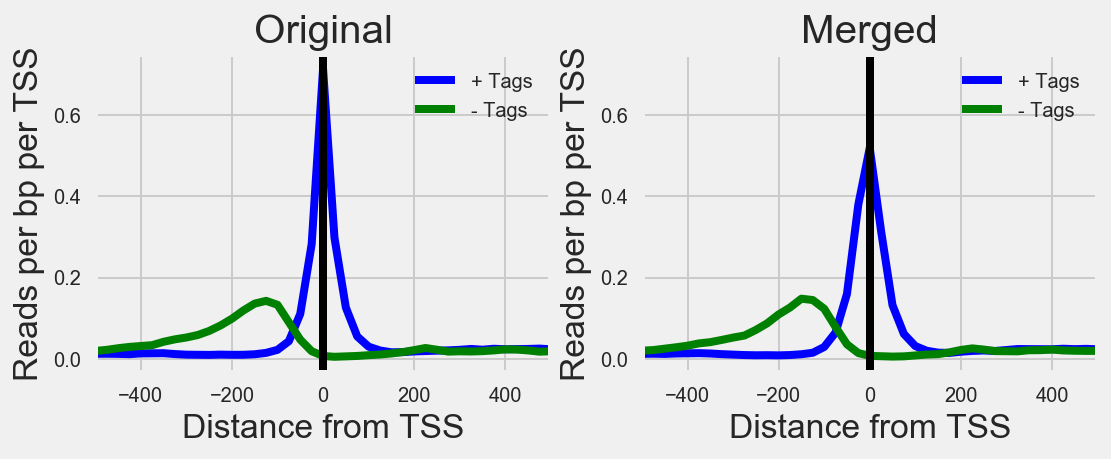

In [39]:
Homer.wrap_hist_plot(['Results/coverage_histograms/GROCap_Brain/sample_Brain_GROCap1_and_Brain_GRO1.hist.exp',
                'Results/coverage_histograms/GROCap_Brain/merged_Brain_GROCap1_and_Brain_GRO1.hist.exp'],
                    names=["Original","Merged"])